###  Columns:

    Gender  : Male or Female
    Age     : Age of the individual in years
    Height  : Height of the individual in meters
    Weight  : Weight of the individual in kilograms
    family_history_with_overweight: Has the individual a family history of overweight or obesity? Yes or No
    FAVC    : Does the individual consume high caloric food frequently? Yes or No
    FCVC    : How often does the individual consume vegetables? 1 (never) , 2 (sometimes), 3 (always)
    NCP     : How many main meals does the individual have daily? 1 to 3
    CAEC    : Does the individual monitor the calories they eat? Sometimes, Frequently, Always or No
    SMOKE   : Does the individual smoke? Yes or No
    CH2O    : How much water does the individual drink daily? 1 (less than a liter), 2 (1 to 2 liters), or 3 (more than 2 liters)
    SCC     : Does the individual monitor the calories they burn? Yes or No
    FAF     : How often does the individual engage in physical activity? 0 (never) to 3 (always)
    TUE     : How many hours does the individual spend sitting on a typical day? 0 (less than an hour), 1 (1 to 2 hours), or 2 (more than 2 hours)
    CALC    : Does the individual take extra calories? Always, Sometimes or No
    MTRANS  : Transportation method used by the individual: Automobile, Bike, Motorbike, Public Transportation or Walking
    NObeyesdad: Obesity level of the individual, 
                 classified into: Insufficient_Weight, Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I, Obesity_Type_II or Obesity_Type_III

###   Step:1 Import the libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import *
import statistics
from scipy import stats
from statsmodels.stats import weightstats
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chi
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as mc

### Step:2 Loading a data set

In [5]:
df=pd.read_csv('obesity_dataset.csv')
df.head(2)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight


### Step:3 Understanding the data

In [7]:
df.shape

(2111, 17)

In [8]:
df.size

35887

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

### Step:4 Checking for duplicates values

In [11]:
df[df.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


### Checking for Null values

In [13]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

### Step5: Dropping the duplicated values

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df[df.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


#### Checking for unique values

In [18]:
col=df.columns.to_list()
col

['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [19]:
for i in col:
    print(i)
    print(df[i].unique())
    print("------------------")

Gender
['Female' 'Male']
------------------
Age
[21.       23.       27.       ... 22.524036 24.361936 23.664709]
------------------
Height
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
------------------
Weight
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
------------------
family_history_with_overweight
['yes' 'no']
------------------
FAVC
['no' 'yes']
------------------
FCVC
[2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084  2.5596
 2.336044 1.813234 2.724285 2.71897  1.133844 1.757466 2.979383 2.204914
 2.927218 2.88853  2.890535 2.530066 2.241606 1.003566 2.652779 2.89789

### Step6: Check for data types of all cols and treating it

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             2087 no

In [22]:
df['Age']=df['Age'].astype(int)

In [23]:
df['Weight']=df['Weight'].astype(int)

In [24]:
df['FCVC']=df['FCVC'].astype(int)

In [25]:
df['CH2O']=df['CH2O'].astype(int)

In [26]:
df['NCP']=df['NCP'].astype(int)

In [27]:
df['FAF']=df['FAF'].astype(int)

In [28]:
df['TUE']=df['TUE'].astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   int32  
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   int32  
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   int32  
 7   NCP                             2087 non-null   int32  
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   int32  
 11  SCC                             2087 non-null   object 
 12  FAF                             2087 no

### Step7: Seperating Numeric and categoric columns

In [31]:
num=df.select_dtypes(include=np.number).columns.to_list()
num

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [32]:
cat=df.select_dtypes(exclude=np.number).columns.to_list()
cat

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

### Step8: Stats analysis

In [34]:
df[num].describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.009104,1.702674,86.503594,2.213225,2.537135,1.705798,0.734068,0.383325
std,6.333297,0.093186,26.086843,0.601259,0.821240,0.591308,0.835860,0.583136
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.000000,1.630178,66.000000,2.000000,2.000000,1.000000,0.000000,0.000000
50%,22.000000,1.701584,83.000000,2.000000,3.000000,2.000000,1.000000,0.000000
75%,26.000000,1.769491,108.000000,3.000000,3.000000,2.000000,1.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [35]:
for i in num:
    x=df[i].mean()
    print(f"The mean of {i} is:",np.round(x))

The mean of Age is: 24.0
The mean of Height is: 2.0
The mean of Weight is: 87.0
The mean of FCVC is: 2.0
The mean of NCP is: 3.0
The mean of CH2O is: 2.0
The mean of FAF is: 1.0
The mean of TUE is: 0.0


In [36]:
for i in num:
    med=df[i].median()
    print(f"The median of {i} is:",np.round(med))

The median of Age is: 22.0
The median of Height is: 2.0
The median of Weight is: 83.0
The median of FCVC is: 2.0
The median of NCP is: 3.0
The median of CH2O is: 2.0
The median of FAF is: 1.0
The median of TUE is: 0.0


In [37]:
for i in num:
    ma=df[i].max()
    print(f"The max of {i} is:",np.round(ma))

The max of Age is: 61
The max of Height is: 2.0
The max of Weight is: 173
The max of FCVC is: 3
The max of NCP is: 4
The max of CH2O is: 3
The max of FAF is: 3
The max of TUE is: 2


In [38]:
df[cat].describe()

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2087,2087,2087,2087,2087,2087,2087,2087,2087
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1052,1722,1844,1761,2043,1991,1380,1558,351


### Step9: Checking for outliers

In [40]:
for i in num:
    Q3=df[i].quantile(0.75)
    Q1=df[i].quantile(0.25)
    IQR=Q3-Q1
    lb=Q1 - 1.5*IQR
    ub=Q3 + 1.5*IQR
    o_l=df[(df[i] < lb) | (df[i] > ub)]
    o_per= (len(o_l)/len(df))*100
    print(f"Outliers of {i}:",o_per)
    print("--------")

Outliers of Age: 7.0436032582654535
--------
Outliers of Height: 0.04791566842357451
--------
Outliers of Weight: 0.04791566842357451
--------
Outliers of FCVC: 0.0
--------
Outliers of NCP: 0.0
--------
Outliers of CH2O: 0.0
--------
Outliers of FAF: 3.5936751317680886
--------
Outliers of TUE: 0.0
--------


###  Step 10: Plot Analysis

### Univariate Analysis for numerical and categorical column

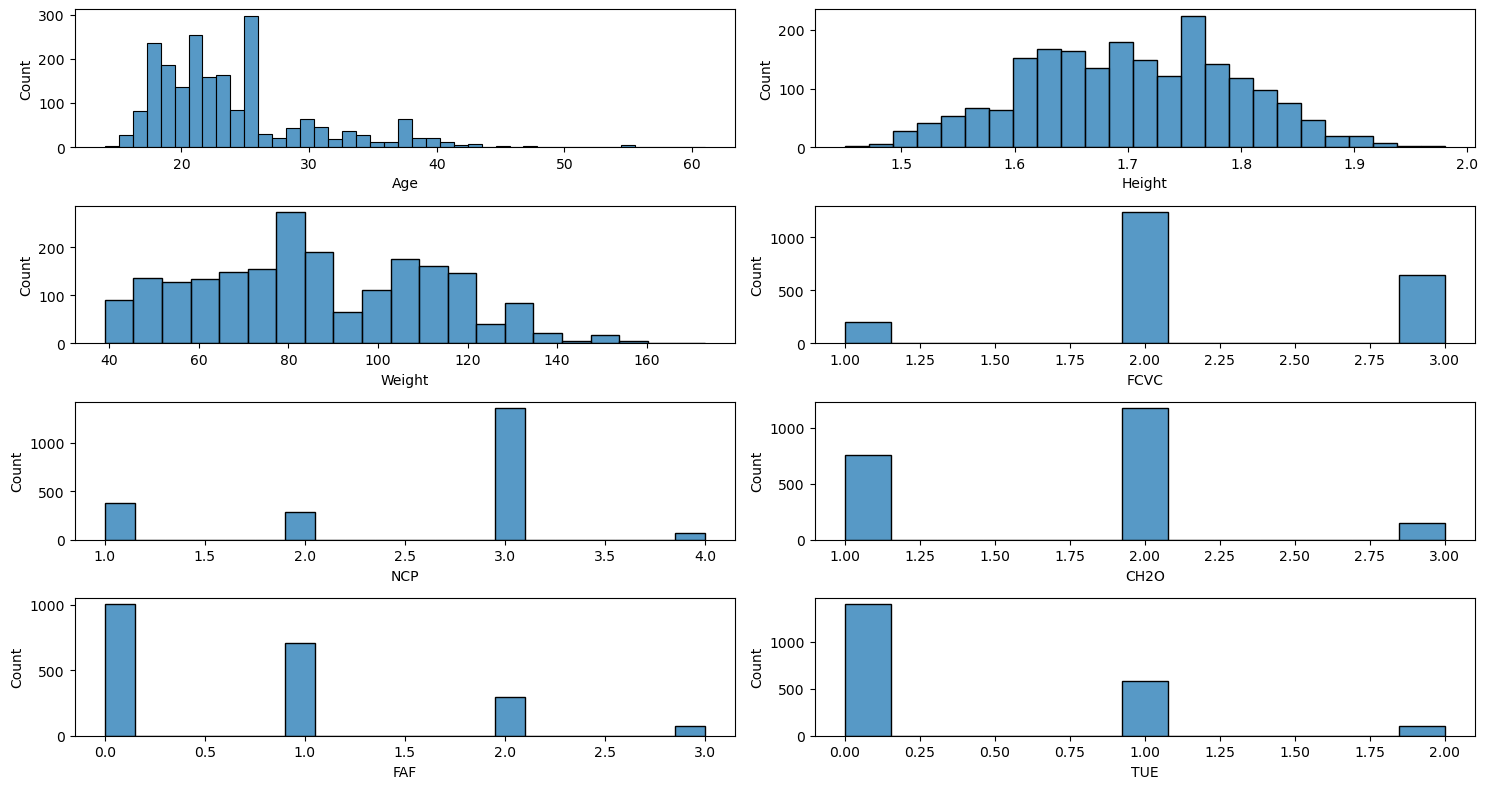

In [43]:
t=1
plt.rcParams['figure.figsize']=[15,8]
for i in num:
    plt.subplot(4,2,t)
    sns.histplot(x=df[i])
    plt.xlabel(i)
    t+=1
plt.tight_layout()
plt.show()

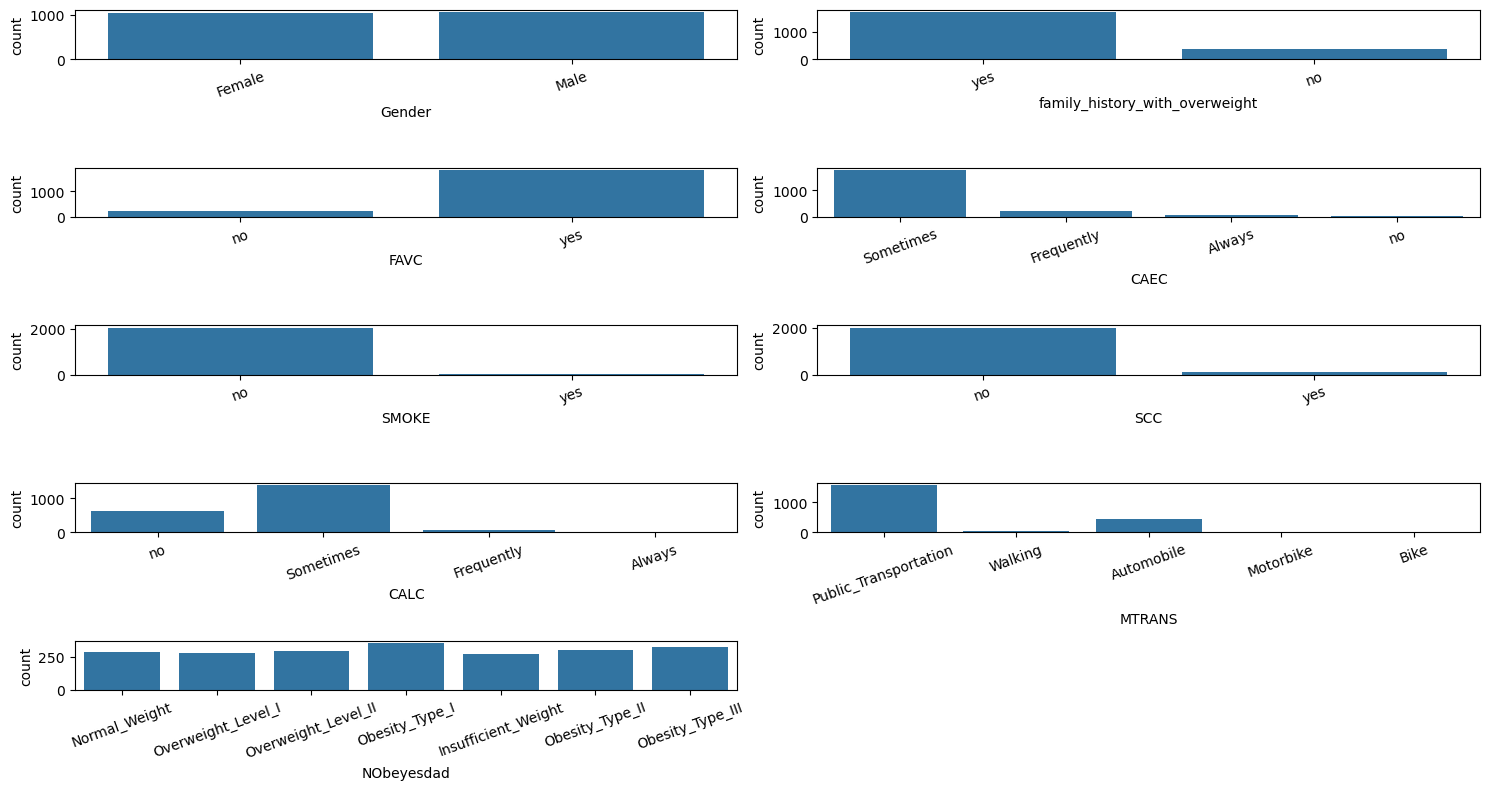

In [44]:
t=1
for i in cat:
    plt.subplot(5,2,t)
    sns.countplot(x=df[i])
    plt.xlabel(i)
    plt.xticks(rotation=20)
    t+=1
plt.tight_layout()
plt.show()

### Bivariate analysis 

In [46]:
### NUM vs NUM

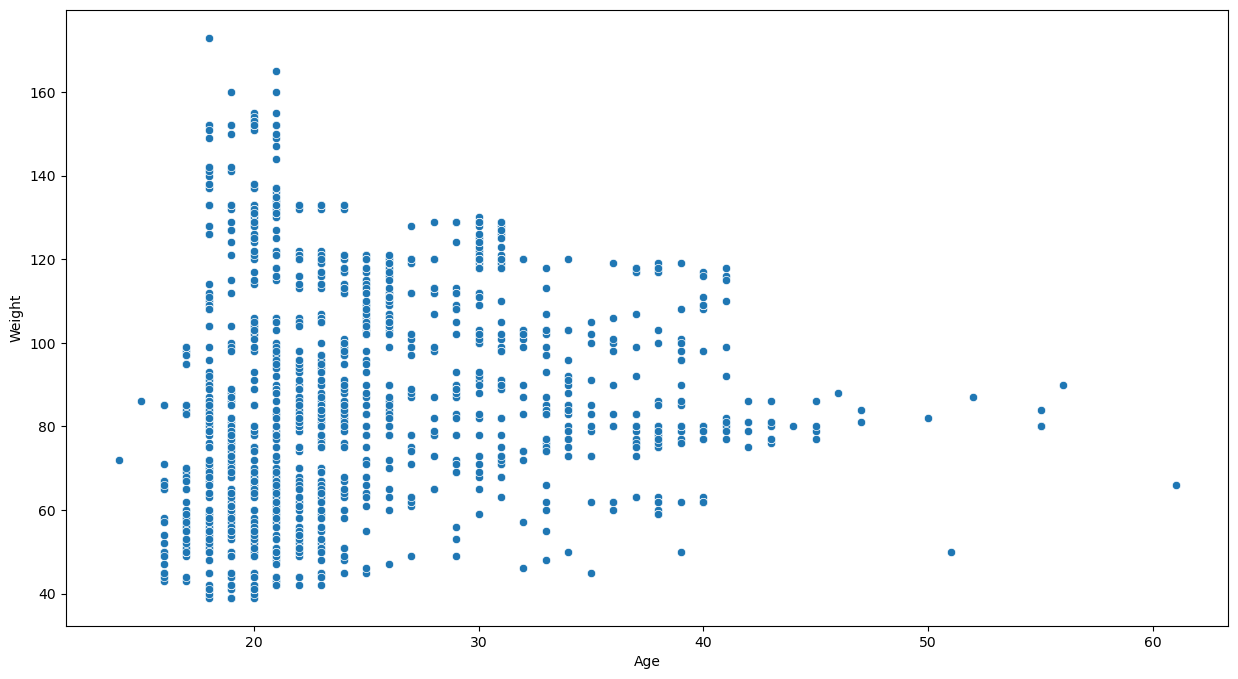

In [47]:
sns.scatterplot(x=df['Age'],y=df['Weight'])
plt.show()

In [48]:
# NUM VS CAT

<Axes: xlabel='Age'>

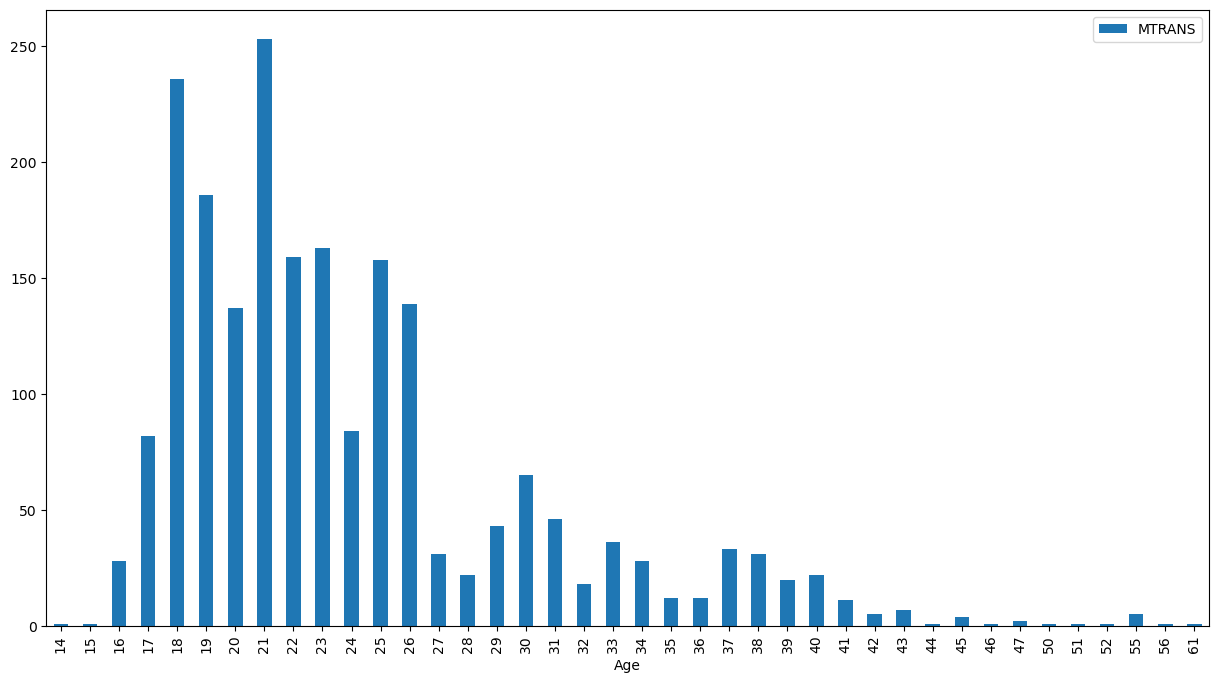

In [49]:
df.pivot_table(index='Age',values='MTRANS',aggfunc='count').plot(kind='bar')

In [50]:
### CAT VS CAT

<Axes: xlabel='Gender'>

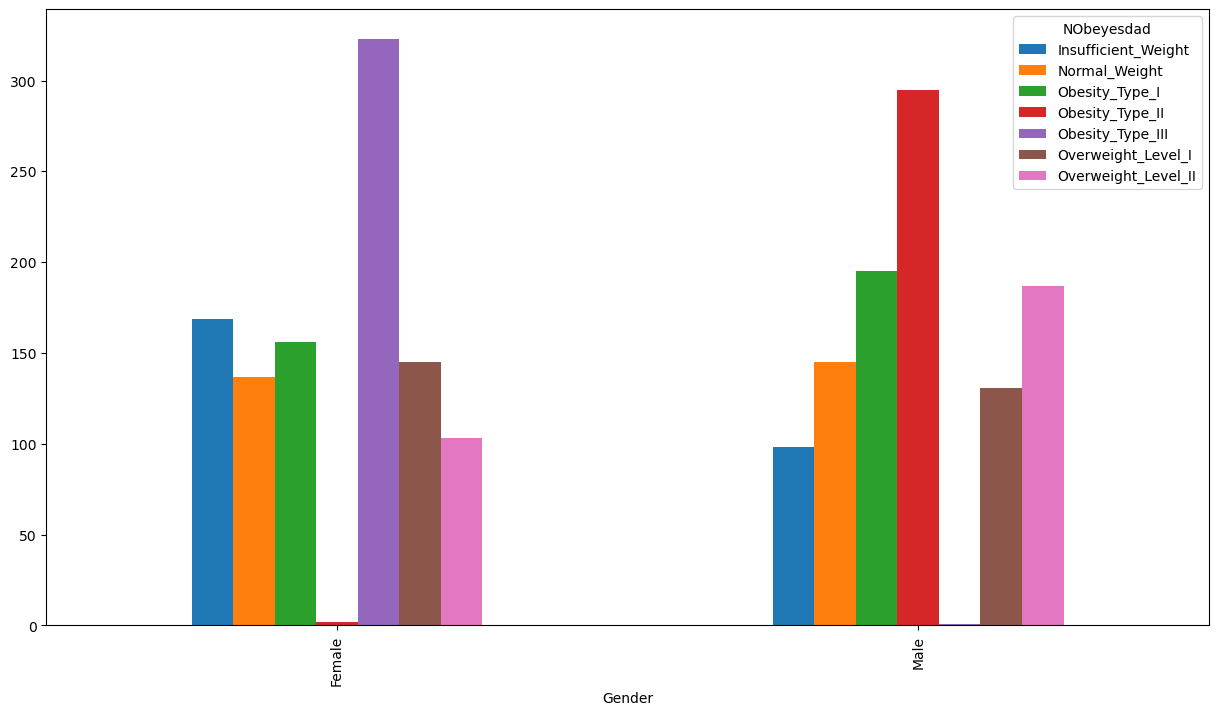

In [51]:
pd.crosstab(index=df["Gender"],columns=df["NObeyesdad"]).plot(kind='bar')

### Multivariate analysis

In [53]:
# Num vs Num vs Cat

<Axes: xlabel='Age', ylabel='Weight'>

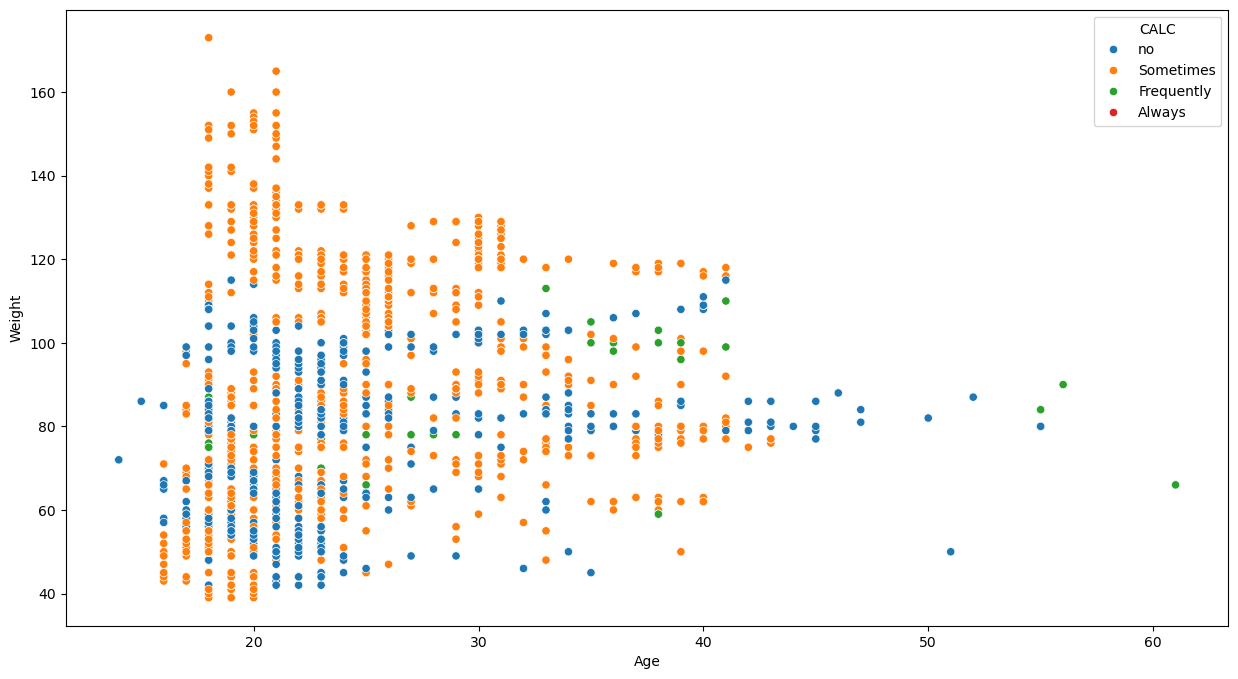

In [54]:
sns.scatterplot(x=df['Age'],y=df["Weight"],hue=df["CALC"])

In [55]:
# Num vs Cat vs Cat

<Axes: xlabel='Weight', ylabel='SMOKE'>

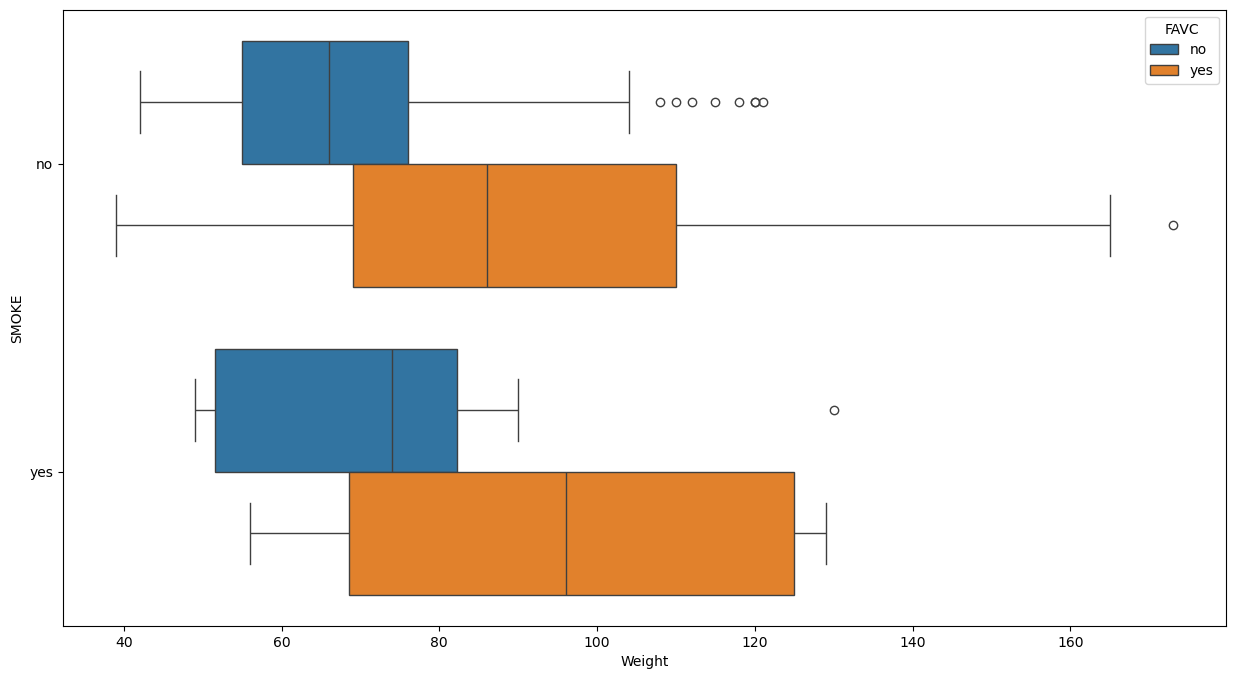

In [56]:
sns.boxplot(x=df['Weight'],y=df["SMOKE"],hue=df["FAVC"])

### Step 11: Hypothesis testing

In [58]:
### Personr correlation  NUM vs NUM

In [59]:
stats.pearsonr(df['FCVC'],df['FAF'])

PearsonRResult(statistic=0.022263136668823524, pvalue=0.30935374638129687)

In [60]:
### T-Test Ind NUM VS CAT

In [61]:
t_stat, p_value = stats.ttest_ind(df['Weight'],df['FCVC'])
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 147.5714476198115
P-value: 0.0


In [62]:
num

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [63]:
### ANOVA Num vs cat

In [64]:
test,pval=stats.shapiro(df['FAF'])
print('pval:',pval)

pval: 2.6961752909360755e-46


In [65]:
A=df[df['NObeyesdad']=='Normal_Weight']['FAF']
B=df[df['NObeyesdad']=='Overweight_Level_I']['FAF']
C= df[df['NObeyesdad']=='Overweight_Level_II']['FAF']
D=df[df['NObeyesdad']=='Obesity_Type_I']['FAF']
E=df[df['NObeyesdad']=='Insufficient_Weight']['FAF']
F=df[df['NObeyesdad']=='Obesity_Type_II']['FAF']
G=df[df['NObeyesdad']=='Obesity_Type_III']['FAF']

In [66]:
stats.levene(A,B,C,D,E,F,G)

LeveneResult(statistic=16.74610529302174, pvalue=5.901439385923885e-19)

### TRANSFORMATION

In [68]:
for i in num:
    sk=df[i].skew()
    print(f" The skewness of {i} :",sk)

 The skewness of Age : 1.5472968841807884
 The skewness of Height : -0.024743014272176542
 The skewness of Weight : 0.24061316531395144
 The skewness of FCVC : -0.1272003453034821
 The skewness of NCP : -0.9143966446968674
 The skewness of CH2O : 0.19236404249532887
 The skewness of FAF : 0.9013512432017549
 The skewness of TUE : 1.245569419493741


In [69]:
p=PowerTransformer()
df['NCP']=p.fit_transform(df[['NCP']])

In [70]:
df['NCP'].skew()

-0.22695429567615227

In [86]:
b=PowerTransformer()
df["FAF"]=b.fit_transform(df[["FAF"]])

In [88]:
df["FAF"].skew()

0.15898106955837144

In [76]:
df['Age_values']=np.log(df['Age'])

In [78]:
df['Age_values'].skew()

0.8786426562369382

### SCALING

In [80]:
for i in num:
    m=max(df[i])
    l=min(df[i])
    v=m-l
    print(f" The value of max {i} is" ,m)
    print(f" The value of  min {i} is" ,l)
    print(f" The value of {i} is" ,v)

 The value of max Age is 61
 The value of  min Age is 14
 The value of Age is 47
 The value of max Height is 1.98
 The value of  min Height is 1.45
 The value of Height is 0.53
 The value of max Weight is 173
 The value of  min Weight is 39
 The value of Weight is 134
 The value of max FCVC is 3
 The value of  min FCVC is 1
 The value of FCVC is 2
 The value of max NCP is 2.634894072846748
 The value of  min NCP is -1.6622305655225464
 The value of NCP is 4.2971246383692945
 The value of max CH2O is 3
 The value of  min CH2O is 1
 The value of CH2O is 2
 The value of max FAF is 3
 The value of  min FAF is 0
 The value of FAF is 3
 The value of max TUE is 2
 The value of  min TUE is 0
 The value of TUE is 2


In [ ]:
Inference:
  * The Age and height column only we need to scaling
  * Other columns are in the range of -3 to +3 which is standardscaling

In [91]:
m=MinMaxScaler()
df['Age']=m.fit_transform(df[['Age']])

In [93]:
z=StandardScaler()
df['Height']=z.fit_transform(df[['Height']])